# Final project

**Data sources**

Child Victims by Age<br>
https://healthdata.gov/dataset/Child-Victims-by-Age/xn3e-yyaj

US population by age and by state<br>
https://www.kff.org/other/state-indicator/distribution-by-age/?dataView=1&currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

Property level of children and all people<br>
https://data.ers.usda.gov/reports.aspx?ID=17826

Alcohol use by state<br>
https://www.cdc.gov/alcohol/data-stats.htm

Mental health by state<br>
https://mhanational.org/issues/2022/ranking-states

2020 presidential election results<br>
https://www.270towin.com/states/

## **1. Which states has the highest or lowest child abuse rate?**

**Observations from code below:**<br> 

Kentucky reported the highest child abuse rate. <br> 
Pennsylvania reported the lowest child abuse rate.<br> 

Top five states with the highest child abuse rate in descending order: <br> 

Kentucky (highest)<br> 
West Virginia<br> 
Massachuesttes<br> 
Maine<br> 
Alaska <br> 

Five states with the lowest child abuse rate in ascending order: <br> 

Pennsylvania (lowest)<br> 
North Carolina<br> 
Washington<br> 
New Jersey<br> 
Virginia <br> 
</div>

**Load the child abuse dataset (csv)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

abuse=pd.read_csv("Child_Victims_by_Age.csv")  # reading csv file
abuse.head()  

,State,<1,1,2,3,4,5,6,7,8,...,"8 Rate per 1,000 Children","9 Rate per 1,000 Children","10 Rate per 1,000 Children","11 Rate per 1,000 Children","12 Rate per 1,000 Children","13 Rate per 1,000 Children","14 Rate per 1,000 Children","15 Rate per 1,000 Children","16 Rate per 1,000 Children","17 Rate per 1,000 Children"
0,Alabama,1945,761,714,731,668,621,578,567,544,...,9.1,9.2,9.0,7.9,7.8,9.1,10.2,9.2,6.5,4.2
1,Alaska,416,221,232,193,205,194,175,166,168,...,16.1,15.4,16.1,15.7,13.2,13.6,11.0,9.3,9.8,6.2
2,Arizona,3380,830,836,738,655,650,564,570,572,...,6.3,5.9,5.3,4.8,5.3,5.0,4.6,4.5,4.1,3.2
3,Arkansas,1814,524,528,487,459,425,381,397,356,...,9.2,8.2,9.7,8.3,8.0,8.7,9.4,9.1,7.6,5.8
4,California,10134,4221,3931,3796,3601,3653,3356,3449,3155,...,6.3,6.5,6.3,6.1,5.9,5.6,5.3,5.2,4.7,3.7


In [2]:
abuse.shape

(54, 39)

**Load the US population dataset**

In [3]:
population=pd.read_csv("raw_data.csv", skiprows=2)
population.head()

,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total,Footnotes
0,United States,75887400.0,27366000.0,39656400.0,83093900.0,42413200.0,54758900.0,323175700.0,1.0
1,Alabama,1157600.0,426600.0,552500.0,1229000.0,669700.0,865500.0,4900800.0,NaN
2,Alaska,184200.0,59200.0,92100.0,180200.0,87200.0,95800.0,698700.0,NaN
3,Arizona,1674800.0,625700.0,875200.0,1737900.0,869500.0,1324300.0,7107300.0,NaN
4,Arkansas,722700.0,256500.0,336700.0,725900.0,382800.0,511700.0,2936400.0,NaN


In [4]:
population.shape

(63, 9)

In [5]:
# Merge the abuse data with the population data

df1=abuse.merge(population, how="left", left_on="State", right_on='Location')
del df1['Location']

df1.head()

,State,<1,1,2,3,4,5,6,7,8,...,"16 Rate per 1,000 Children","17 Rate per 1,000 Children",Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total,Footnotes
0,Alabama,1945,761,714,731,668,621,578,567,544,...,6.5,4.2,1157600.0,426600.0,552500.0,1229000.0,669700.0,865500.0,4900800.0,NaN
1,Alaska,416,221,232,193,205,194,175,166,168,...,9.8,6.2,184200.0,59200.0,92100.0,180200.0,87200.0,95800.0,698700.0,NaN
2,Arizona,3380,830,836,738,655,650,564,570,572,...,4.1,3.2,1674800.0,625700.0,875200.0,1737900.0,869500.0,1324300.0,7107300.0,NaN
3,Arkansas,1814,524,528,487,459,425,381,397,356,...,7.6,5.8,722700.0,256500.0,336700.0,725900.0,382800.0,511700.0,2936400.0,NaN
4,California,10134,4221,3931,3796,3601,3653,3356,3449,3155,...,4.7,3.7,9073100.0,3356200.0,5136800.0,10201100.0,4735800.0,5876100.0,38379200.0,NaN


In [6]:
df1.shape

(54, 47)

In [7]:
# Retain rows of the state level only, remove the national level data

filter = (df1["State"]=="National") | (df1["State"]=="Reporting States")  # remove the national and reporting state rows
df1=df1.loc[~filter, ]

In [8]:
df1.shape  

(52, 47)

In [9]:
# Calulate the rate of child abuse of each state using the "Total Victim" which sums all child age groups. 

df1["Total Rate per 1,000 Children"] = round(df1[' Total Victims']/df1['Children 0-18']*1000, 3)

In [10]:
# Find the state with the higest child abuse rate

df1['State'][df1["Total Rate per 1,000 Children"]==df1["Total Rate per 1,000 Children"].max()]

17    Kentucky
Name: State, dtype: object

In [11]:
# Kentucky has the highest child abuse rate. 

In [12]:
# Find the top five states with the highest child abuse rate

df1['State'][df1["Total Rate per 1,000 Children"].sort_values(ascending=False).index[:5]]

17         Kentucky
49    West Virginia
21    Massachusetts
19            Maine
1            Alaska
Name: State, dtype: object

In [13]:
# Top five states with the highest child abuse rate in descending order: 

# Kentucky (highest)
# West Virginia
# Massachuesttes
# Maine
# Alaska 

In [14]:
# Find the state with the lowest child abuse rate

df1['State'][df1["Total Rate per 1,000 Children"]==df1["Total Rate per 1,000 Children"].min()]

38    Pennsylvania
Name: State, dtype: object

In [15]:
# Pennsylvania has the lowest child abuse rate. 

In [16]:
# Find the five states with the lowest child abuse rate.

df1['State'][df1["Total Rate per 1,000 Children"].sort_values(ascending=True).index[:5]]

38      Pennsylvania
33    North Carolina
48        Washington
30        New Jersey
47          Virginia
Name: State, dtype: object

In [17]:
# states with the lowest child abuse rate in ascending order: 

# Pennsylvania (lowest)
# North Carolina
# Washington
# New Jersey
# Virginia 

Text(0.5, 1.0, 'Histogram of Child Abuse of 52 States/Regions')

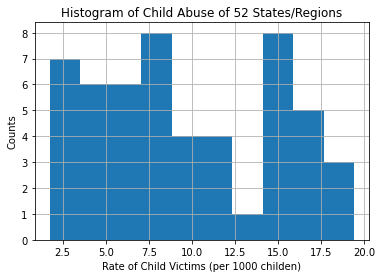

In [18]:
# Plot a histogram of the rate of child abuse for all states

df1["Total Rate per 1,000 Children"].hist(bins=10)
plt.xlabel('Rate of Child Victims (per 1000 childen)')
plt.ylabel('Counts')
plt.title('Histogram of Child Abuse of 52 States/Regions')

In [19]:
# Histogram seems to show a bimodal distribution.  

## **2. At which age were the abuse cases reported the most?** ##

**Observations from code below:**<br>

Cases of child abuse were reported significantly more among children 
less than 1 year old than any other ages.  The older the children get, the few abuse cases were reported.

In [20]:
#  Transpose the dataset, so that the age is the index

dft=df1.set_index('State').T

In [21]:
dft.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
<1,1945.0,416.0,3380.0,1814.0,10134.0,1773.0,1062.0,126.0,206.0,5126.0,...,255.0,2221.0,11614.0,1209.0,60.0,749.0,399.0,1321.0,537.0,145.0
1,761.0,221.0,830.0,524.0,4221.0,801.0,547.0,95.0,95.0,2493.0,...,141.0,782.0,5471.0,551.0,54.0,441.0,314.0,401.0,314.0,84.0
2,714.0,232.0,836.0,528.0,3931.0,781.0,471.0,68.0,87.0,2378.0,...,125.0,521.0,5195.0,601.0,55.0,438.0,322.0,412.0,308.0,77.0
3,731.0,193.0,738.0,487.0,3796.0,719.0,420.0,69.0,126.0,2310.0,...,96.0,508.0,4839.0,522.0,61.0,408.0,289.0,354.0,277.0,75.0
4,668.0,205.0,655.0,459.0,3601.0,751.0,421.0,65.0,107.0,2037.0,...,109.0,488.0,4604.0,545.0,49.0,376.0,265.0,392.0,288.0,71.0


In [22]:
# Calculate the total number of child abuse cases by age (summing cases in all states for specific ages)

df_age=pd.DataFrame(dft.sum(axis=1)[:18].sort_values(ascending=False))
df_age.columns=["total cases"]

df_age

,total cases
<1,97879.0
1,44411.0
2,42073.0
3,40307.0
4,38708.0
5,37858.0
6,36303.0
7,34576.0
8,33015.0
9,32890.0


Text(0.5, 1.0, 'Abuse cases by age')

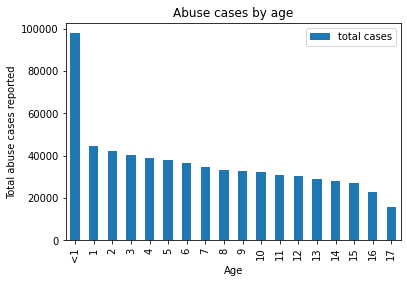

In [23]:
# Plot a bar graph showing any trend between age and total number of child abuse cases

df_age.plot.bar()
plt.xlabel("Age")
plt.ylabel("Total abuse cases reported")
plt.title("Abuse cases by age")

**Observations:**<br>

Cases of child abuse were reported significantly more among children 
less than 1 year old than any other ages.  The older the children get, 
the few abuse cases were reported.

## **3. How binge drinking prevalence, poverty and mental health are associated with child abuse?** ##

**Observations from code below:**<br>

Based on the regression lines, the rate of child abuse seems to be weakly correlated with children poverty and all poverty.

Although I didn't observe a correlation between child abuse and drinking prevalence or mental illness in this analysis, a comparison of child abuse rate between family with mental illness and without, and between family with alcohol addiction and without, could better elucidate a trend.


In [24]:
drinking=pd.read_excel("Binge drinking.xlsx")  # loading binge drinking excel file

In [25]:
drinking.head()

,State,"Binge drinking prevalence†, % (95% CI)"
0,Alabama,13.7 (12.3-15.3)
1,Alaska,17.7 (16.1-19.5)
2,Arizona,17.2 (16.0-18.4)
3,Arkansas,13.9 (12.3-15.7)
4,California,15.5 (14.3-16.8)


In [26]:
drinking.dtypes

State                                     object
Binge drinking prevalence†, % (95% CI)    object
dtype: object

In [27]:
# Create a function that converts string to float
 
def get_prevalence(string):
    """(string)->float
    
    The input of the function is a string, and the function keeps 
    the first 4 characters and converts to a float. 
    The function returns the float.  
    
    >>> get_prevalence(drinking['Binge drinking prevalence†, % (95% CI)'][0])
    13.7
    
    """
    
    return float(string[:4])

In [28]:
import doctest
doctest.run_docstring_examples(get_prevalence, globals(), verbose=True)

Finding tests in NoName
Trying:
    get_prevalence(drinking['Binge drinking prevalence†, % (95% CI)'][0])
Expecting:
    13.7
ok


In [29]:
get_prevalence(drinking['Binge drinking prevalence†, % (95% CI)'][0])

13.7

In [30]:
# Convert string to float for drinking dataset, more specifically, 
# all binge drinking prevalences (in str format) to float, 
# and store in a new column "drinking_prevalence_%".

drinking["drinking_pevalence_%"]=drinking['Binge drinking prevalence†, % (95% CI)'].apply(get_prevalence)

In [31]:
drinking.head()

,State,"Binge drinking prevalence†, % (95% CI)",drinking_pevalence_%
0,Alabama,13.7 (12.3-15.3),13.7
1,Alaska,17.7 (16.1-19.5),17.7
2,Arizona,17.2 (16.0-18.4),17.2
3,Arkansas,13.9 (12.3-15.7),13.9
4,California,15.5 (14.3-16.8),15.5


In [32]:
# Merge drinking dataset with child abuse dataset

df2a=drinking.merge(df1, how="left", left_on="State", right_on="State")

In [33]:
# Keep the columns that I need for analysis, discard the rest

df2=df2a[["State", "drinking_pevalence_%", "Total Rate per 1,000 Children"]]

In [34]:
df2.head()

,State,drinking_pevalence_%,"Total Rate per 1,000 Children"
0,Alabama,13.7,10.087
1,Alaska,17.7,16.607
2,Arizona,17.2,7.671
3,Arkansas,13.9,11.654
4,California,15.5,7.066


In [35]:
# loading poverty dataset

poverty=pd.read_excel("poverty.xlsx", header=[0,1])  

In [36]:
poverty.columns

MultiIndex([(                          'Unnamed: 0_level_0',        'Name'),
            (        'All people in poverty (2020), 90% CI',     'Percent'),
            (        'All people in poverty (2020), 90% CI', 'Lower Bound'),
            (        'All people in poverty (2020), 90% CI', 'Upper Bound'),
            ('Children ages 0-17 in poverty (2020), 90% CI',     'Percent'),
            ('Children ages 0-17 in poverty (2020), 90% CI', 'Lower Bound'),
            ('Children ages 0-17 in poverty (2020), 90% CI', 'Upper Bound')],
           )

In [37]:
poverty.head()

Unnamed: 0_level_0 All people in poverty (2020), 90% CI              \
                Name                              Percent Lower Bound   
0            Alabama                                 14.9        14.5   
1             Alaska                                  9.6         9.1   
2            Arizona                                 12.8        12.4   
3           Arkansas                                 15.2        14.7   
4         California                                 11.5        11.3   

              Children ages 0-17 in poverty (2020), 90% CI              \
  Upper Bound                                      Percent Lower Bound   
0        15.3                                         20.9        20.0   
1        10.1                                         12.3        11.3   
2        13.2                                         17.6        16.7   
3        15.7                                         20.8        19.8   
4        11.7                                         14.6        14.2   

               
  Upper Bound  
0        21.8  
1        13.3  
2        18.5  
3        21.8  
4        15.0

In [38]:
# Rename the columns

poverty.columns=["State", "all_poverty_percent", "all_upper bound", 'all_lower bound', 
                "children_poverty_percent", "children_upper bound", 'children_lower bound']

In [39]:
poverty.head()

,State,all_poverty_percent,all_upper bound,all_lower bound,children_poverty_percent,children_upper bound,children_lower bound
0,Alabama,14.9,14.5,15.3,20.9,20.0,21.8
1,Alaska,9.6,9.1,10.1,12.3,11.3,13.3
2,Arizona,12.8,12.4,13.2,17.6,16.7,18.5
3,Arkansas,15.2,14.7,15.7,20.8,19.8,21.8
4,California,11.5,11.3,11.7,14.6,14.2,15.0


In [40]:
# Keep the columns that I need for analysis, discard the rest

poverty=poverty[["State", "all_poverty_percent", "children_poverty_percent"]]

In [41]:
# Merge poverty dataset with drinking dataset and child abuse dataset

df3=df2.merge(poverty, how="left", on="State")

In [42]:
df3.head()

,State,drinking_pevalence_%,"Total Rate per 1,000 Children",all_poverty_percent,children_poverty_percent
0,Alabama,13.7,10.087,14.9,20.9
1,Alaska,17.7,16.607,9.6,12.3
2,Arizona,17.2,7.671,12.8,17.6
3,Arkansas,13.9,11.654,15.2,20.8
4,California,15.5,7.066,11.5,14.6


Load mental illness dataset

In [43]:
mental=pd.read_excel("mental_health_ranking.xlsx")

In [44]:
mental.head()  

# Low rank means low prevalence of mental illness

,State,MH Rank
0,New Jersey,1
1,Wisconsin,2
2,Massachusetts,3
3,Connecticut,4
4,New York,5


In [45]:
# Merge mental illness dataset with poverty, drinking, and child abuse dataset

df4=df3.merge(mental, how="left", on="State")

In [46]:
df4.head()

,State,drinking_pevalence_%,"Total Rate per 1,000 Children",all_poverty_percent,children_poverty_percent,MH Rank
0,Alabama,13.7,10.087,14.9,20.9,47
1,Alaska,17.7,16.607,9.6,12.3,46
2,Arizona,17.2,7.671,12.8,17.6,35
3,Arkansas,13.9,11.654,15.2,20.8,16
4,California,15.5,7.066,11.5,14.6,28


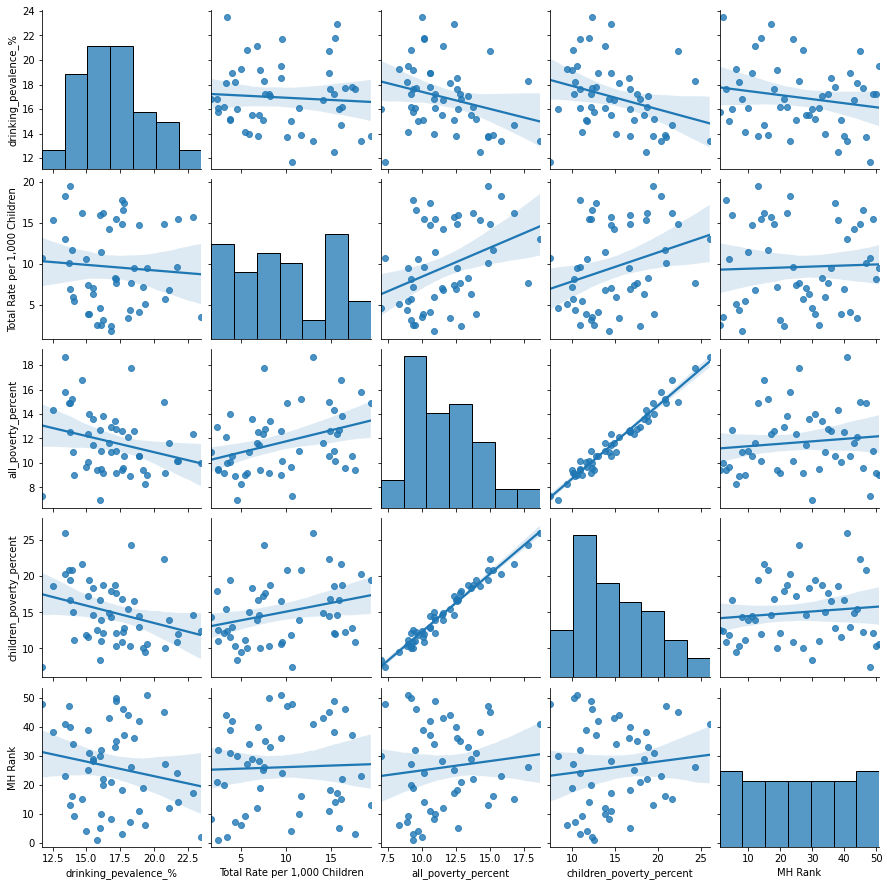

In [47]:
# Explore any correlation among variables in df4

import seaborn as sns

sns.pairplot(df4, kind="reg")

**Observations from code above:**<br>

Based on the regression lines, the rate of child abuse seem to be weakly correlated with children poverty and all poverty.<br>

Although I didn't observe a correlation between child abuse and drinking prevalence or mental illness in this analysis, a comparison of child abuse rate between family with mental illness and without, and between family with alcohol addiction and without, could better elucidate a trend.  

## **4. Any difference in the rate of child abuse between blue and red states?** ##

**Observation from code below:**<br>

The average rate of child abuse in republican states was 11.5% higher than in democratic states.

In [48]:
# load election dataset

election=pd.read_excel("election 2020.xlsx")  

In [49]:
election.head()

,State,Party
0,Alabama,R
1,Alaska,R
2,Arizona,D
3,Arkansas,R
4,California,D


In [50]:
# Merge election dataset with child abuse dataset

df5=election.merge(df2a, how="left", on="State")

In [51]:
# Keep the columns that I need, and discard the rest

df5=df5[["State","Party"," Total Victims", 'Children 0-18']]

In [52]:
df5.head()

,State,Party,Total Victims,Children 0-18
0,Alabama,R,11677,1157600.0
1,Alaska,R,3059,184200.0
2,Arizona,D,12847,1674800.0
3,Arkansas,R,8422,722700.0
4,California,D,64115,9073100.0


In [53]:
# Aggregate or groupby by Party and calculate the sum of Total Victims and 
# the sum of children population

summary=df5.groupby('Party').sum()

In [54]:
summary

,Total Victims,Children 0-18
Party,,
D,347145,42477100.0
R,304360,33410500.0


In [55]:
# Calculate the average child abuse rate in democratic states and republican states

summary["child abuse rate"]=summary[" Total Victims"]/summary['Children 0-18']

In [56]:
summary.reset_index(inplace=True)

In [57]:
summary

,Party,Total Victims,Children 0-18,child abuse rate
0,D,347145,42477100.0,0.008173
1,R,304360,33410500.0,0.009110


In [58]:
R_rate=summary[summary["Party"]=="R"]["child abuse rate"].values[0]
R_rate

0.009109711018991036

In [59]:
D_rate=summary[summary["Party"]=="D"]["child abuse rate"].values[0]
D_rate

0.008172521193772644

In [60]:
# Calculate the difference in child abuse rate between D and R states.

difference=(R_rate/D_rate-1)
round(difference,3)

0.115

**Observation:**<br>

The average rate of child abuse in republican states was 11.5% higher than in democratic states.

## **5. Any other difference observed between the blue and red states using the above datasets?** ##

**Observations from code below:**

There is no significant difference (~1%) in binge drinking prevalence between the democratic and republican states.

Republican states show worse poverty conditions than democratic state: 15% and 17% higher in all poverty rate and children poverty rate than democratic states, respectively.

Republican states show worse mental health conditions than democratic state: 27% higher than in mental illness ranking than democratic states. Note: lower MH rank is, the better mental health of the people in the state.


In [61]:
# Merge the election dataset with drinking, poverty and mental health datasets

summary2=election.merge(df4, how="left", on="State")

In [62]:
summary2.columns

Index(['State', 'Party', 'drinking_pevalence_%',
       'Total Rate per 1,000 Children', 'all_poverty_percent',
       'children_poverty_percent', 'MH Rank'],
      dtype='object')

In [63]:
# Groupby by Party, and calcuate the mean of drinking_pevalence_%,
# all_poverty_percent, children_poverty_percent, MH Rank.

summary2=summary2.groupby('Party').agg({'drinking_pevalence_%': 'mean',
                              "all_poverty_percent":"mean",
                              'children_poverty_percent':"mean",
                              'MH Rank': 'mean'}).round(2)

In [64]:
summary2

,drinking_pevalence_%,all_poverty_percent,children_poverty_percent,MH Rank
Party,,,,
D,17.01,10.77,13.70,22.22
R,16.86,12.72,16.42,30.25


In [65]:
# Calculate the difference between D and R in column variables, and store 
# the difference in a row called "difference".

summary2.loc['difference']=round(summary2.loc['D']/summary2.loc['R']-1,2)

In [66]:
summary2

,drinking_pevalence_%,all_poverty_percent,children_poverty_percent,MH Rank
Party,,,,
D,17.01,10.77,13.70,22.22
R,16.86,12.72,16.42,30.25
difference,0.01,-0.15,-0.17,-0.27


Text(0.5, 1.0, 'Comparison of Democratic and Republic States')

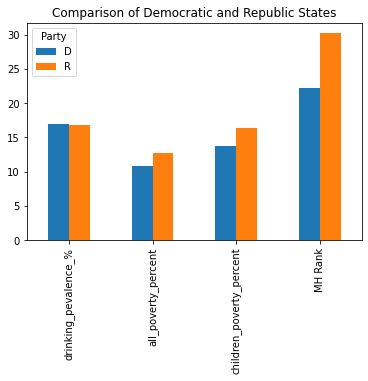

In [79]:
summary2.iloc[:2,].T.plot.bar()
plt.title("Comparison of Democratic and Republic States")

**Observations:**

There is no significant difference (~1%) in binge drinking prevalence between the democratic and republican states.  

Republican states show worse poverty conditions than democratic state: 15% and 17% higher in all poverty rate and children poverty rate than democratic states, respectively.

Republican states show worse mental health conditions than democratic state: 27% higher than in mental illness ranking than democratic states.  Note: lower MH rank is, the better mental health of the people in the state.  

End of final project